# Fitting Equations to Data

## Data Science Inferences from Visual Display of Data 

Recall our line chart tool, and the time-speed data

Consider the experimental data below

|Elapsed Time (s)|Speed (m/s)|
|---:|---:|
|0 |0|
|1.0 |3|
|2.0 |7|
|3.0 |12|
|4.0 |20|
|5.0 |30|
|6.0 | 45.6| 

Show the relationship between time and speed.  What can we learn about the relationship? Is it linear, quadratic, cubic, hyperbolic?  How do we explore these questions?

---

First lets define a plotting function that plots **observations** and **data model** values on same chart.  The convention in these notes is red markers are the data and blue curves are the model. 

```{note}
In the context herein, the observations are the actual **data**; the model (a straight line, parabola, or some other functional relationship $y=f(x)$) is the data model.  We may stipulate the structure of the model such as $y=\text{slope}\cdot x + \text{intercept}$, or more conventionally $y=mx+b$ and seek values of **m** and **b** that explain the observations.
```

In [1]:
import matplotlib.pyplot as plt
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='v',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Observations','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.show()
    return

Test our function, we will plot the data as red markers and the model as blue lines; in this instance we will just reuse data so the plot will look perfect, but its only to test the plotting function.

In [2]:
# Create two lists; time  and speed - these represent observations
time = [0,1.0,2.0,3.0,4.0,5.0,6.0]
speed = [0,3,7,12,20,30,45.6]

First just plot the data as red markers

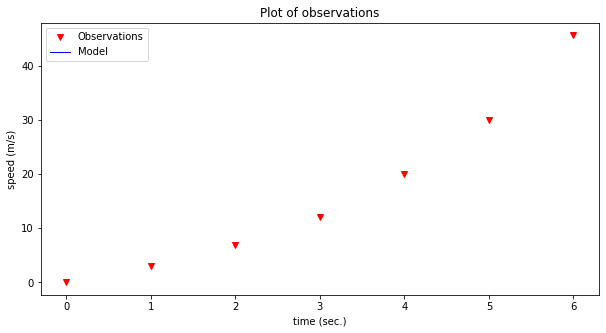

In [3]:
make2plot(time,speed,[0,0],[0,0],'time (sec.)','speed (m/s)','Plot of observations') # the blue line is all at 0,0

Now plot the same data as a blue line

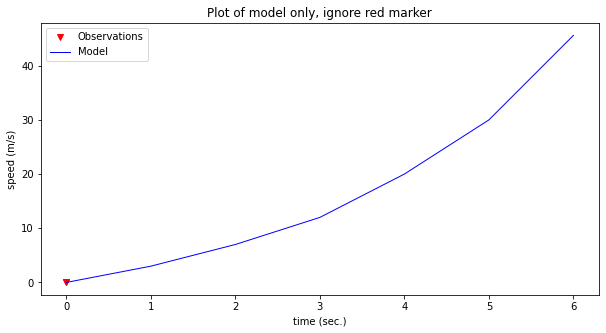

In [4]:
make2plot([0,0],[0,0],time,speed,'time (sec.)','speed (m/s)','Plot of model only, ignore red marker') # the red markers all at 0,0

Now both on same graph (we are reusing the lists, so fit will appear perfect)

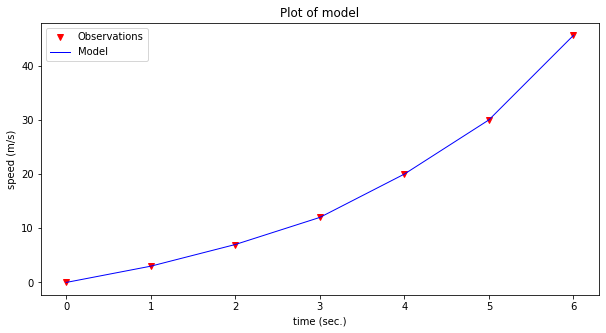

In [5]:
make2plot(time,speed,time,speed,'time (sec.)','speed (m/s)','Plot of model') # the red markers all at 0,0

---

Now we can consider a data model.  For this example, lets simply stipulate that the relationship may be up to a 3-rd order polynomial.

$y = \beta_0 + \beta_1 \cdot x + \beta_2 \cdot x^2 + \beta_2 \cdot x^3$

where $y$ in this example is speed in meters/second, and $x$ is time in seconds.  As a data model all we are doing is explaining the structure of the relationship, if we knew that it is a physical process we might adjust our model to be constant acceleration kinematics.  However for the example, the polynomial will suffice.

In [6]:
# Create a data model - lets use a polynomial model
def polynomial(b0,b1,b2,b3,x):
    # return y = b0 + b1*x + b2*x**2 + b3*x**3
    polynomial=b0+b1*x+b2*x**2+b3*x**3  
    return(polynomial)

Now we have a data model, that returns speed given time according to a polynomial equation.

Lets dcompare some guesses at values for $\beta_0,\beta_2,\beta_2,\beta_3$ 

Parameter set \#1

> - b0 = 0
> - b1 = 6
> - b2 = 0.12
> - b3 = 0

Parameter set \#2

> - b0 = 0
> - b1 = 1.3
> - b2 = 0.75
> - b3 = 0.05

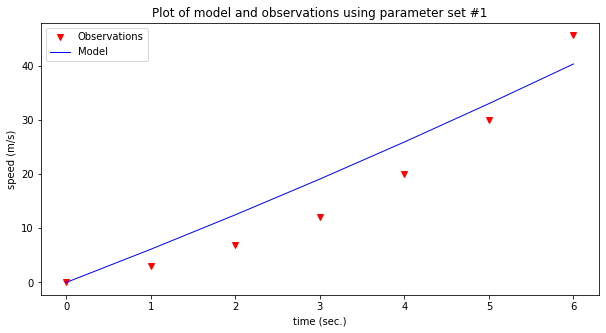

In [7]:
# prompt for inputs of b0,b1,b2,b3
# do some trial and error 0,1.3,0.75,0.05
#intercept=float(input('Enter b0 value'))
#linear=float(input('Enter b1 value'))
#quadratic=float(input('Enter b2 value'))
#cubic=float(input('Enter b3 value '))
intercept=0
linear=6
quadratic=0.12
cubic=0
# build a data model
modelSpeed = [] # empty list
for i in range(len(time)):
    modelSpeed.append(polynomial(intercept,linear,quadratic,cubic,time[i]))
# Plotting results
make2plot(time,speed,time,modelSpeed,'time (sec.)','speed (m/s)','Plot of model and observations using parameter set #1')

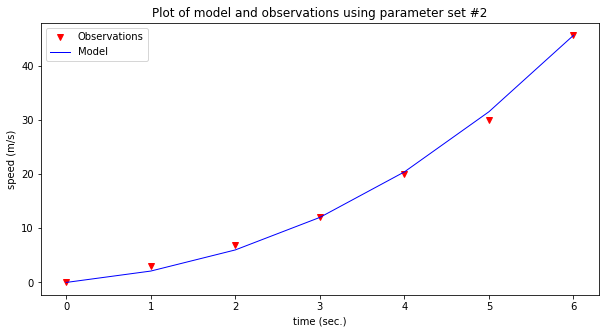

In [8]:
# prompt for inputs of b0,b1,b2,b3
# do some trial and error 0,1.3,0.75,0.05
#intercept=float(input('Enter b0 value'))
#linear=float(input('Enter b1 value'))
#quadratic=float(input('Enter b2 value'))
#cubic=float(input('Enter b3 value '))
intercept=0
linear=1.3
quadratic=0.75
cubic=0.05
# build a data model
modelSpeed = [] # empty list
for i in range(len(time)):
    modelSpeed.append(polynomial(intercept,linear,quadratic,cubic,time[i]))
# Plotting results
make2plot(time,speed,time,modelSpeed,'time (sec.)','speed (m/s)','Plot of model and observations using parameter set #2')

Now assess the model; which one seems to explain the observations better?  That's really the gist of exploratory data analysis.

The last plot looks kind of decent, how could we "measure" the model's prediction value?

We can compute the difference between the observations and the model, add them all up and see how close to perfect we get.

In [9]:
# Prediction Error Function
def pred_err(list1,list2):
    if len(list1)==len(list2):
        pe = [] # empty list to store prediction errors
        for i in range(len(list1)):
            pe.append(list1[i]-list2[i])
        return(sum(pe))
    else:
        print('incompatible lists, check your data')
        return('false')

print(pred_err(speed,modelSpeed))

8.881784197001252e-15


Seems pretty great, except maybe the positive and negative errors are cancelling each outer leading us to falsely believe our model is awesome.  A more strict error would be to consider absolute values as in:

In [10]:
# Prediction Error Function
def abs_err(list1,list2):
    if len(list1)==len(list2):
        pe = [] # empty list to store prediction errors
        for i in range(len(list1)):
            pe.append(abs(list1[i]-list2[i]))
        return(sum(pe))
    else:
        print('incompatible lists, check your data')
        return('false')

print(abs_err(speed,modelSpeed))

3.800000000000006


Or the commonly used sum of squared errors

In [11]:
# Prediction Error Function
def ssq_err(list1,list2):
    if len(list1)==len(list2):
        pe = [] # empty list to store prediction errors
        for i in range(len(list1)):
            pe.append(pow((list1[i]-list2[i]),2))
        return(sum(pe))
    else:
        print('incompatible lists, check your data')
        return('false')

print(ssq_err(speed,modelSpeed))

4.219999999999999


It becomes apparent quickly that it is a hastle to keep going back, so lets wrap things in a while loop so we can keep track of our trials, and make  our tool interactive.

```{note}
You will need to copy-paste into a notebook to run the script below - be sure to include the functions above
```

```
quit=True
# put some default values
intercept=0
linear=0
quadratic=0
cubic=0
# here is the control loop
while quit:
# prompt for inputs of b0,b1,b2,b3
# do some trial and error 0,1.3,0.75,0.05
    intercept=float(input('Enter b0 value, current value = '+str(intercept)))
    linear=float(input('Enter b1 value, current value = '+str(linear)))
    quadratic=float(input('Enter b2 value, current value = '+str(quadratic)))
    cubic=float(input('Enter b3 value, current value = '+str(cubic)))
# build a data model
    modelSpeed = [] # empty list
    for i in range(len(time)):
        modelSpeed.append(polynomial(intercept,linear,quadratic,cubic,time[i]))
# Plotting results
    make2plot(time,speed,time,modelSpeed,'time (sec.)','speed (m/s)','Plot of model and observations')
    # Squared Prediction Error
    print('Current squared error = ',ssq_err(speed,modelSpeed))
    stop = input('do you want to stop? y or n') # here is how we stop
    if stop == 'y':
        quit=False
    else:
        continue # keep going!
```

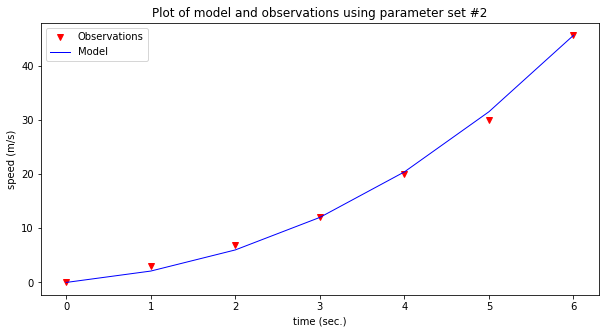

In [12]:
intercept=0
linear=1.3
quadratic=0.75
cubic=0.05
# build a data model
modelSpeed = [] # empty list
for i in range(len(time)):
    modelSpeed.append(polynomial(intercept,linear,quadratic,cubic,time[i]))
# Plotting results
make2plot(time,speed,time,modelSpeed,'time (sec.)','speed (m/s)','Plot of model and observations using parameter set #2')

Now lets predict a value within our observations, say the speed at 4.5 seconds.  Looking at the graph it looks like about 25 m/sec.  But we have the data model, so just use it.

In [13]:
#mytime=float(input('enter an elapsed time'))
mytime = 4.5
myspeed = polynomial(intercept,linear,quadratic,cubic,mytime)
print('The estimated speed at t =',mytime,'is',myspeed,'meters per secund')

The estimated speed at t = 4.5 is 25.59375 meters per secund


Now lets predict a value beyond the observations, say the speed at 7 seconds.  Looking at the graph the best we can say is if the curvature is extended the value is somewhere near 60 (surely bigger than 45).   But beyond that we know nothing.  The data model allows extrapolation simply because we have **declared** it the relationship that explains the observatons.  If the model were based on some physical, chemical, or biological process we might actually be comfortable making extrapolations; here we will just stipulate that 1 more second is close to the observations, so we will extrapolate; again using our data model:

In [14]:
#mytime=float(input('enter an elapsed time'))
mytime = 7
myspeed = polynomial(intercept,linear,quadratic,cubic,mytime)
print('The estimated speed at t =',mytime,'is',myspeed,'meters per secund')

The estimated speed at t = 7 is 63.0 meters per secund
